---
# 3. Running on Real Devices

## Question 3.1

**How do you find the least busy device to run the following circuit from the previous section?**

<img src="..\images\advanced_circuits_images\merged.png" align="left" width="300"/>

**1)** `least_busy(provider.backends())`

**2)** `least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 5))`

**3)**  `provider.backends(filters=lambda x: x.configuration().n_qubits >= 5
  and not x.configuration().simulator and x.status().operational==True)`

**4)** Both 1 & 3 are correct

**5)** None of the above

In [2]:
from qiskit import IBMQ
provider = IBMQ.load_account()
from qiskit.providers.ibmq import least_busy

ibmqfactory.load_account:WARNING:2022-06-17 08:36:24,057: Credentials are already in use. The existing account in the session will be replaced.


In [3]:
for backend in provider.backends():
    print(f'name: {backend}, number of qubits: {backend.configuration().n_qubits}')

name: ibmq_qasm_simulator, number of qubits: 32
name: ibmq_armonk, number of qubits: 1
name: ibmq_santiago, number of qubits: 5
name: ibmq_bogota, number of qubits: 5
name: ibmq_lima, number of qubits: 5
name: ibmq_belem, number of qubits: 5
name: ibmq_quito, number of qubits: 5
name: simulator_statevector, number of qubits: 32
name: simulator_mps, number of qubits: 100
name: simulator_extended_stabilizer, number of qubits: 63
name: simulator_stabilizer, number of qubits: 5000
name: ibmq_manila, number of qubits: 5
name: ibm_oslo, number of qubits: 7


In [3]:
provider.backends(filters=lambda x: x.configuration().n_qubits >= 5)

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_os

In [5]:
# List of quantum backends with more than 5 qubits, and that are current operational
backend_list = provider.backends(filters=lambda x: x.configuration().n_qubits >= 5
  and not x.configuration().simulator and x.status().operational==True)

for backend in backend_list:
    print(f'name: {backend}, number of qubits: {backend.configuration().n_qubits}')

name: ibmq_santiago, number of qubits: 5
name: ibmq_bogota, number of qubits: 5
name: ibmq_lima, number of qubits: 5
name: ibmq_belem, number of qubits: 5
name: ibmq_quito, number of qubits: 5
name: ibmq_manila, number of qubits: 5
name: ibm_oslo, number of qubits: 7


---
## Question 3.2

**How do you retrieve the last run job from a backend?**

**1)** `backend.jobs()[0]`

**2)** `backend.jobs()[-1]`

**3)** `backend.retrieve_job()[0]`

**4)** `backend.retrieve_job()[-1]`

**5)** None of the above

In [6]:
from qiskit import QuantumCircuit

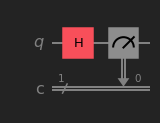

In [7]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
qc.draw()

In [8]:
from qiskit.tools.monitor import job_monitor

In [9]:
backend = least_busy(backend_list)
print(backend)

ibm_oslo


In [10]:
from qiskit import execute

In [ ]:
job = execute(qc, backend=backend)
job_monitor(job)

Job Status: job is queued (2)     

In [ ]:
from qiskit.tools.visualization import plot_histogram

In [ ]:
plot_histogram(job.result().get_counts(qc))

In [ ]:
job2 = backend.jobs()[0]
plot_histogram(job2.result().get_counts(qc))